In [1]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom
import os
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import glob
import re

from skimage import measure, morphology
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.segmentation import clear_border
from skimage.filters import roberts, sobel

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
DATA_PATH = '/kaggle_3/stage1_processed_unseg/'
DATA_PATH2 = '/kaggle_2/stage2_processed_unseg/'
PATIENT_SCANS = 'scan_lungs_'
DATA_PATH_SEGMENTED = '/kaggle/dev/data-science-bowl-2017-data/stage1_processed/'
PATIENT_SCANS_SEGMENTED_LUNGS = 'scan_segmented_lungs_'
PATIENT_SCANS_SEGMENTED_LUNGS_FILL = 'scan_segmented_lungs_fill_'

In [3]:
def plot_3d(image, threshold=-300):
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces = measure.marching_cubes(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

In [4]:
patient_ids = []

for folder in glob.glob(DATA_PATH + PATIENT_SCANS + '*')[0:10]:
    m = re.match(PATIENT_SCANS +'([a-f0-9].*).npy', os.path.basename(folder))
    patient_uid = m.group(1)
    patient_ids.append(patient_uid)

# for folder in glob.glob(DATA_PATH2 + PATIENT_SCANS + '*')[0:10]:
#     m = re.match(PATIENT_SCANS +'([a-f0-9].*).npy', os.path.basename(folder))
#     patient_uid = m.group(1)
#     patient_ids.add(patient_uid)

In [5]:
patient_scans = []
for patient_id in patient_ids:
    print('patient_id (UNSEGMENTED)', patient_id)
    if os.path.isfile(DATA_PATH + PATIENT_SCANS + patient_id + '.npy'):
        scans = np.load(DATA_PATH + PATIENT_SCANS + patient_id + '.npy')
        patient_scans.append(scans)
    elif os.path.isfile(DATA_PATH2 + PATIENT_SCANS + patient_id + '.npy'):
        scans = np.load(DATA_PATH2 + PATIENT_SCANS + patient_id + '.npy')
        patient_scans.append(scans)
    else:
        with open("error.out", "a") as myfile:
            myfile.write('Couldnt find scan for patient {}'.format(patient_id))

patient_scans_segented_lungs = []
for patient_id in patient_ids:
    print('patient_id (SEGMENTED LUNGS)', patient_id)
    scans = np.load(DATA_PATH_SEGMENTED + PATIENT_SCANS_SEGMENTED_LUNGS + patient_id + '.npy')
    patient_scans_segented_lungs.append(scans)
    
patient_scans_segented_lungs_fill = []
for patient_id in patient_ids:
    print('patient_id (SEGMENTED LUNGS FILL)', patient_id)
    scans = np.load(DATA_PATH_SEGMENTED + PATIENT_SCANS_SEGMENTED_LUNGS_FILL + patient_id + '.npy')
    patient_scans_segented_lungs_fill.append(scans)


patient_id (UNSEGMENTED) 3295f3f392d8e130155c8912b60161b5
patient_id (UNSEGMENTED) c928b4fee44ea322ac65348ae2ff20b8
patient_id (UNSEGMENTED) a334d15ac8d2d25bce76693b1b2a3ed7
patient_id (UNSEGMENTED) 7395f64fba89c2463a1b13c400adf876
patient_id (UNSEGMENTED) 089b8f10743e449a0f64f8f311dd8a46
patient_id (UNSEGMENTED) fbae4d04285789dfa32124c86586dd09
patient_id (UNSEGMENTED) 1e0f8048728717064645cb758eb89279
patient_id (UNSEGMENTED) 7ec258e536a1e0353375295ad1b71e5b
patient_id (UNSEGMENTED) b82efe72526c59a96257208d95e54baf
patient_id (UNSEGMENTED) 4b2f615f5498ee9d935b0229a2e6bb19
patient_id (SEGMENTED LUNGS) 3295f3f392d8e130155c8912b60161b5
patient_id (SEGMENTED LUNGS) c928b4fee44ea322ac65348ae2ff20b8
patient_id (SEGMENTED LUNGS) a334d15ac8d2d25bce76693b1b2a3ed7
patient_id (SEGMENTED LUNGS) 7395f64fba89c2463a1b13c400adf876
patient_id (SEGMENTED LUNGS) 089b8f10743e449a0f64f8f311dd8a46
patient_id (SEGMENTED LUNGS) fbae4d04285789dfa32124c86586dd09
patient_id (SEGMENTED LUNGS) 1e0f804872871706464

patient_id: 3295f3f392d8e130155c8912b60161b5
------UN-SEGMENTED SCAN------


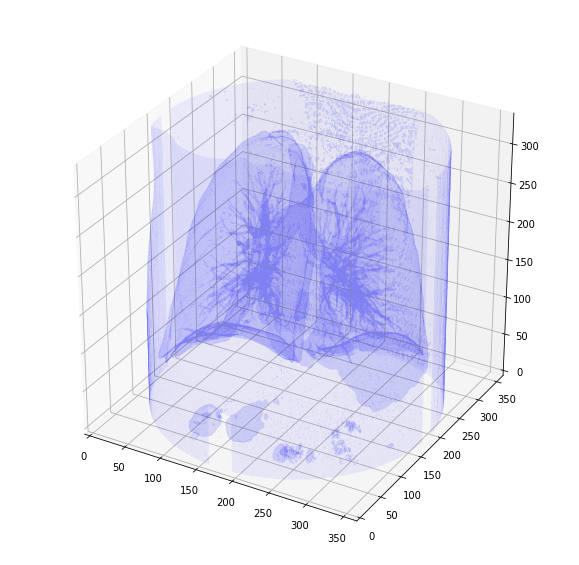

------SEGMENTED LUNGS------


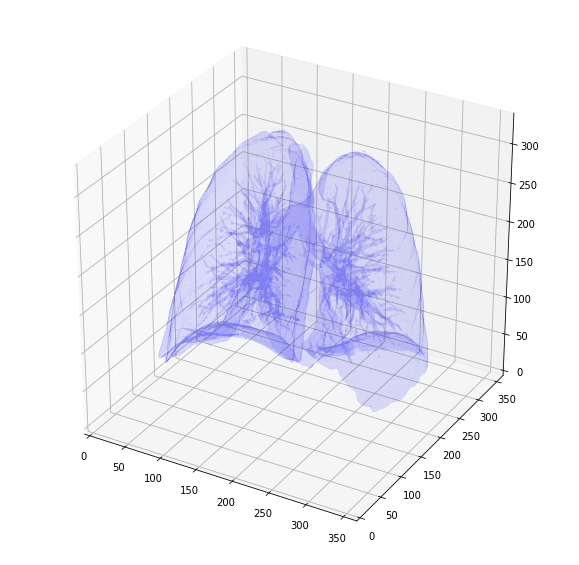

------SEGMENTED LUNGS FILL------


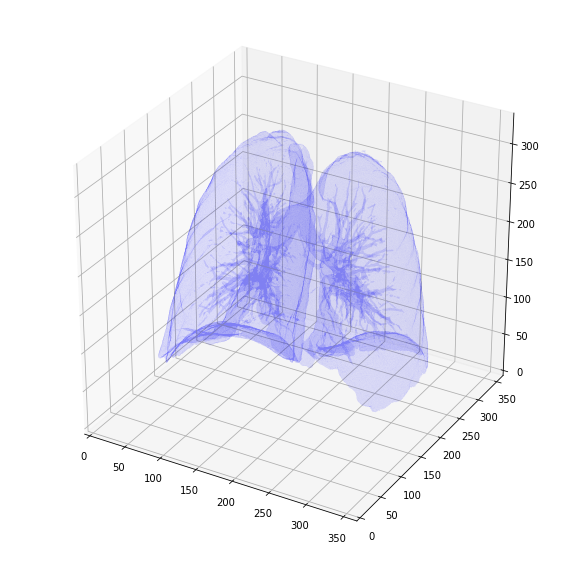

patient_id: c928b4fee44ea322ac65348ae2ff20b8
------UN-SEGMENTED SCAN------


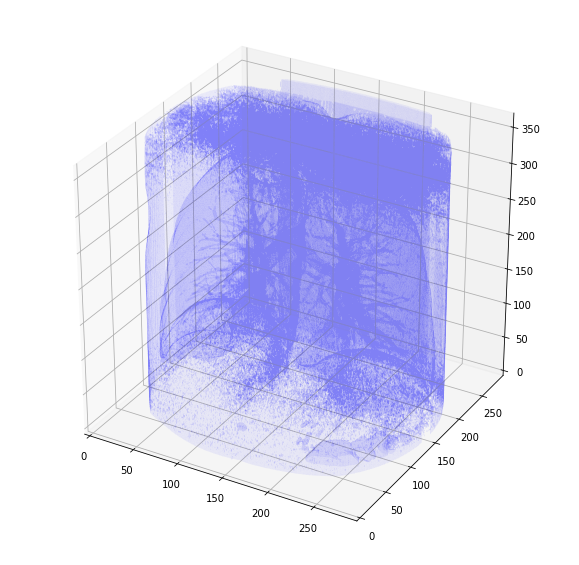

------SEGMENTED LUNGS------


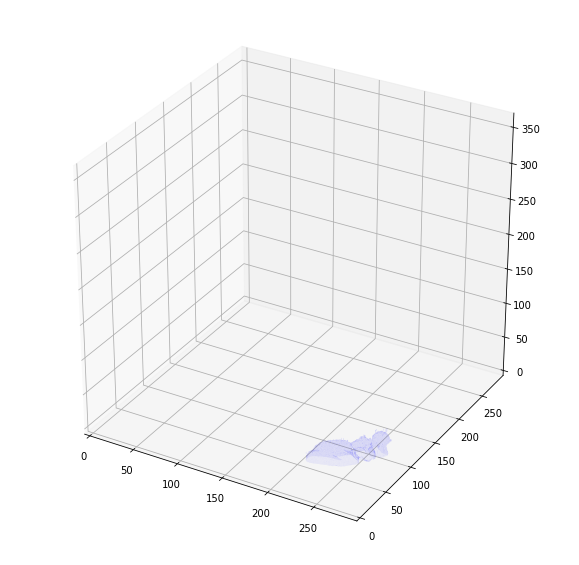

------SEGMENTED LUNGS FILL------


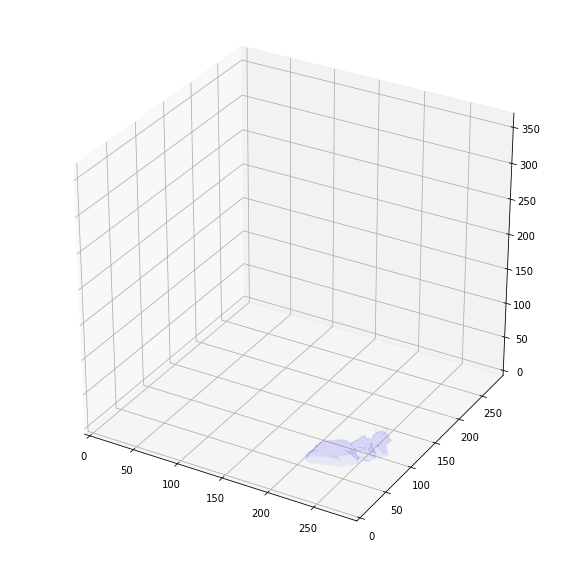

patient_id: a334d15ac8d2d25bce76693b1b2a3ed7
------UN-SEGMENTED SCAN------


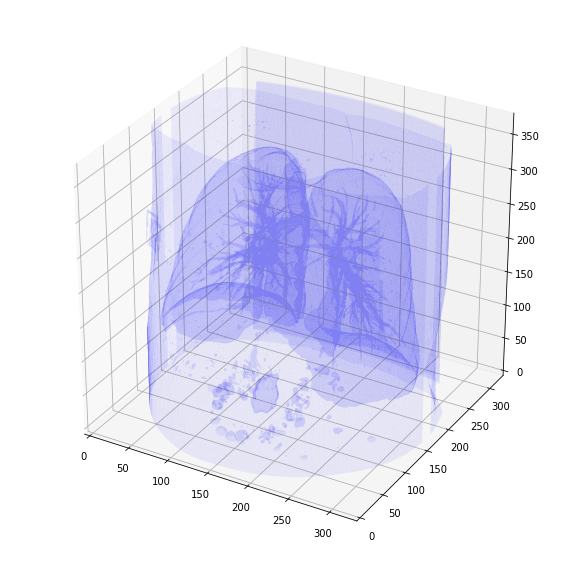

------SEGMENTED LUNGS------


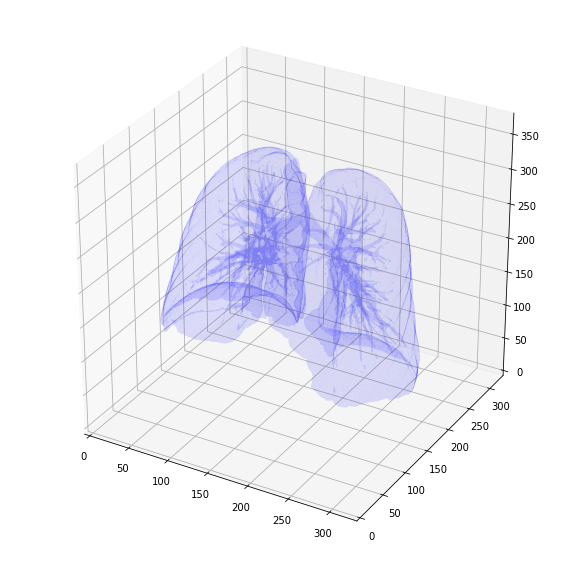

------SEGMENTED LUNGS FILL------


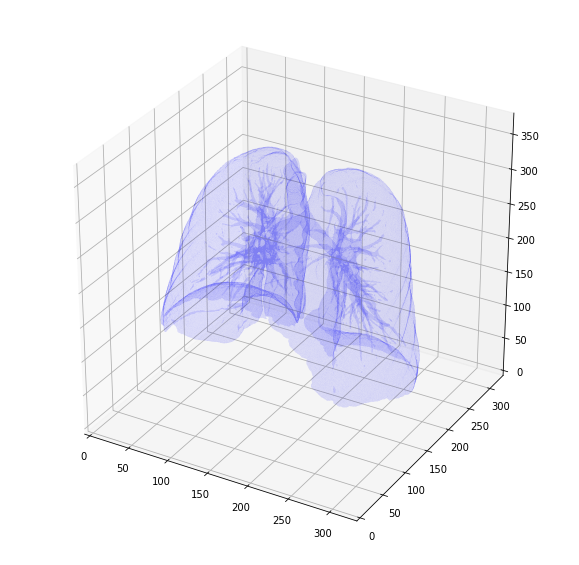

patient_id: 7395f64fba89c2463a1b13c400adf876
------UN-SEGMENTED SCAN------


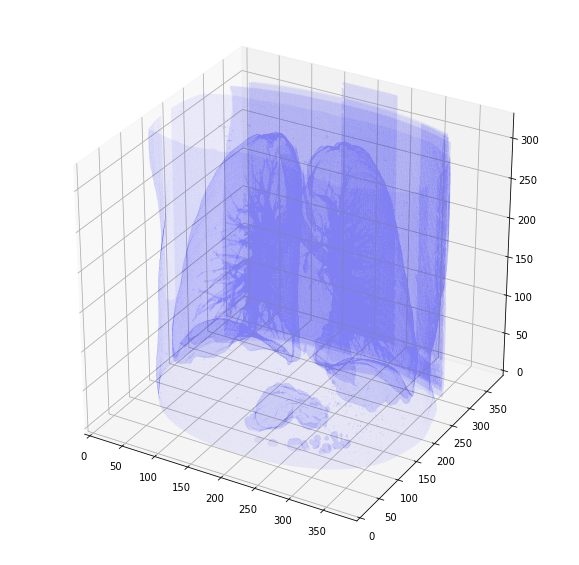

------SEGMENTED LUNGS------


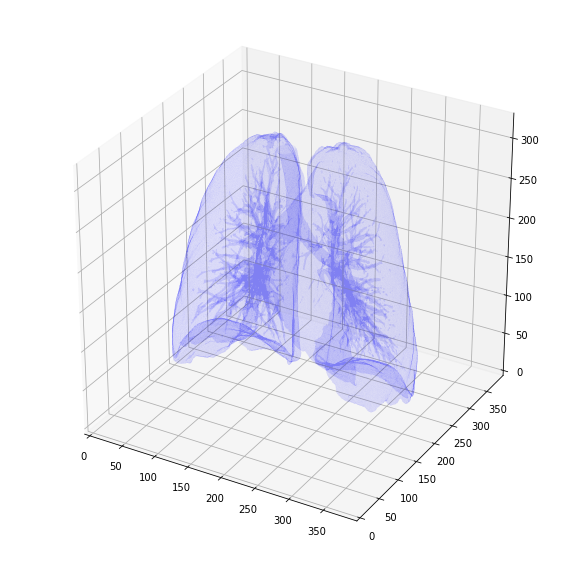

------SEGMENTED LUNGS FILL------


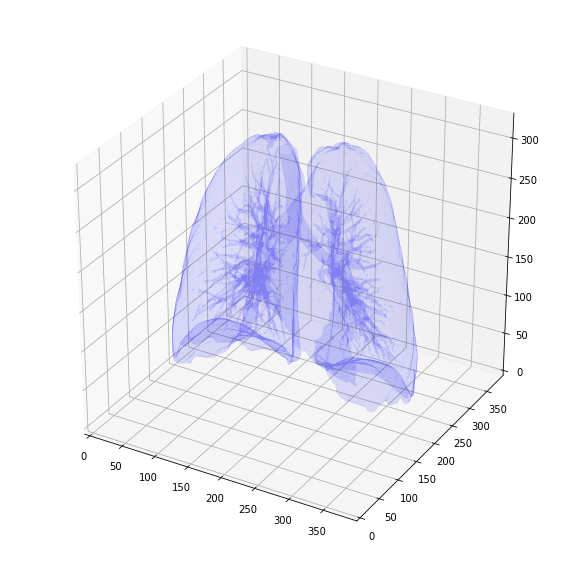

patient_id: 089b8f10743e449a0f64f8f311dd8a46
------UN-SEGMENTED SCAN------


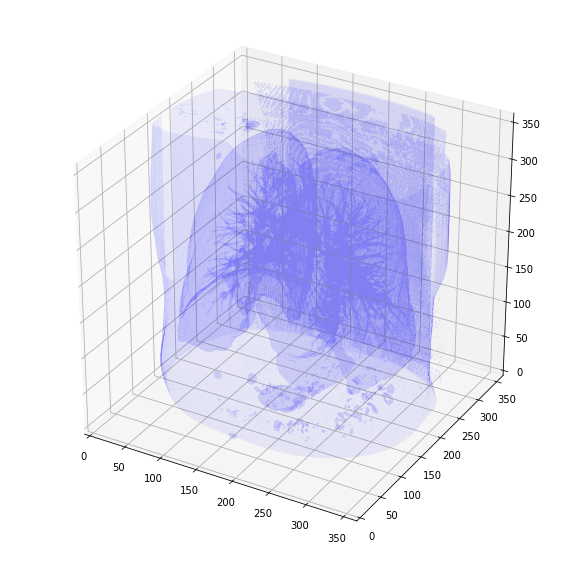

------SEGMENTED LUNGS------


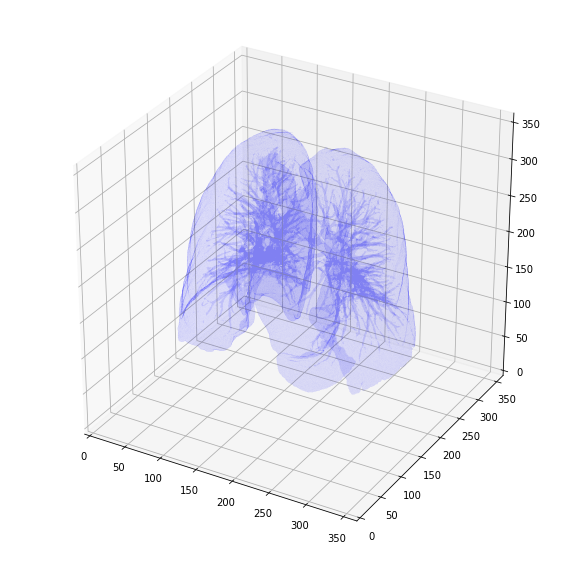

------SEGMENTED LUNGS FILL------


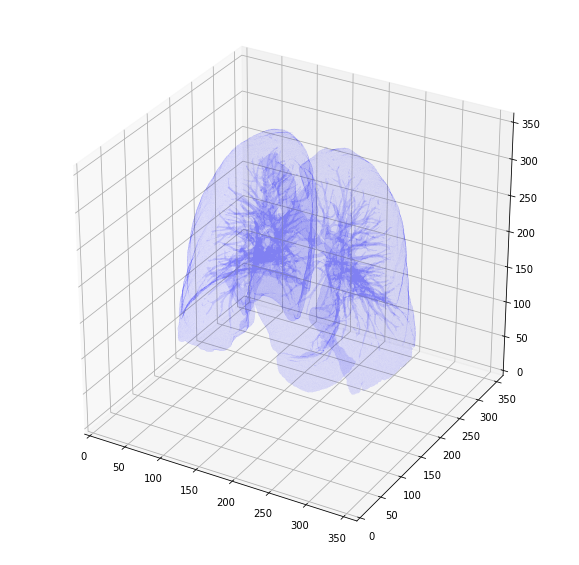

patient_id: fbae4d04285789dfa32124c86586dd09
------UN-SEGMENTED SCAN------


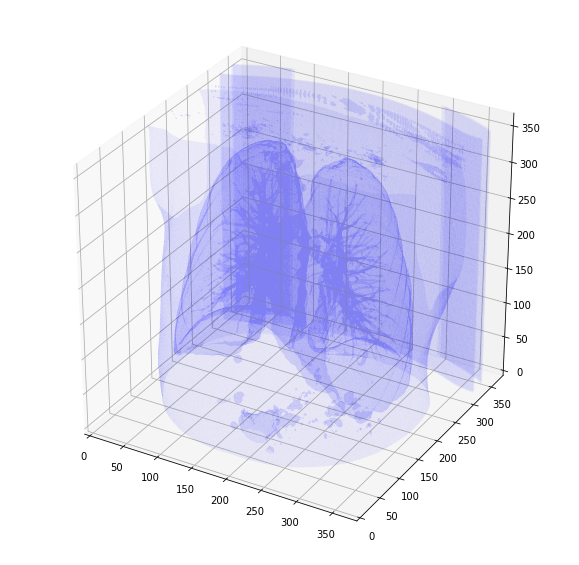

------SEGMENTED LUNGS------


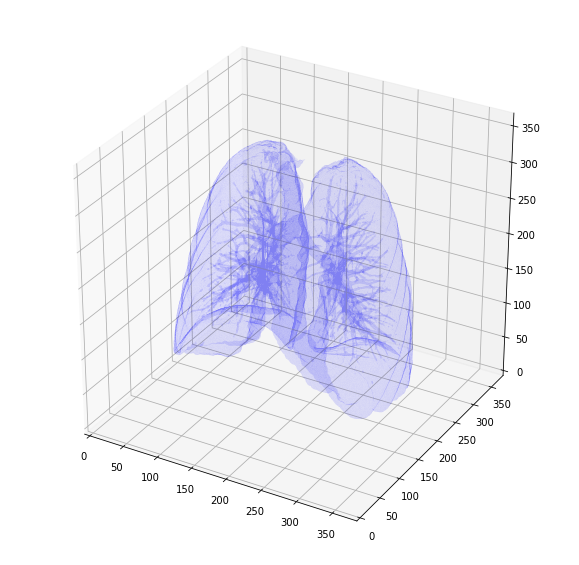

------SEGMENTED LUNGS FILL------


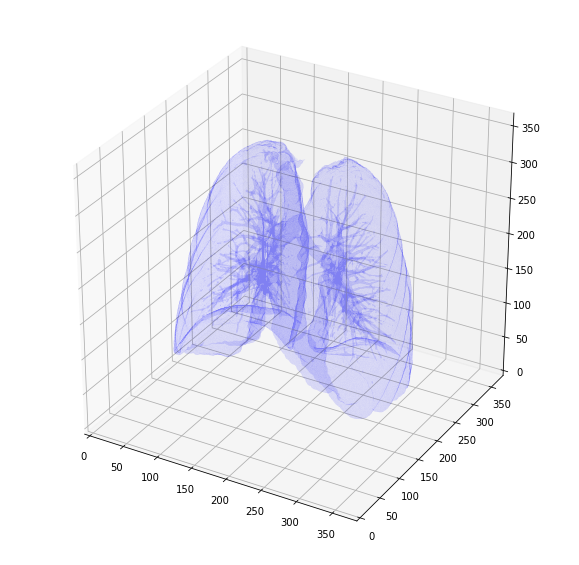

patient_id: 1e0f8048728717064645cb758eb89279
------UN-SEGMENTED SCAN------


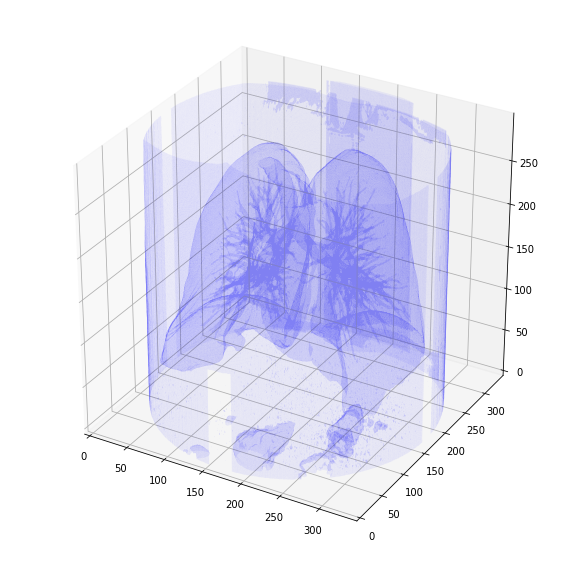

------SEGMENTED LUNGS------


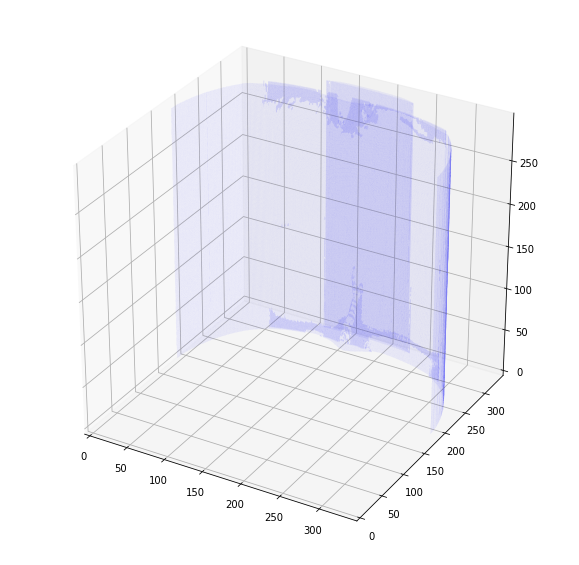

------SEGMENTED LUNGS FILL------


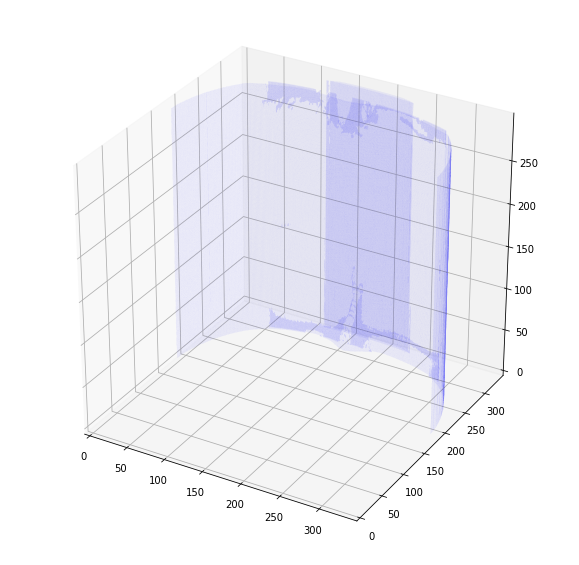

patient_id: 7ec258e536a1e0353375295ad1b71e5b
------UN-SEGMENTED SCAN------


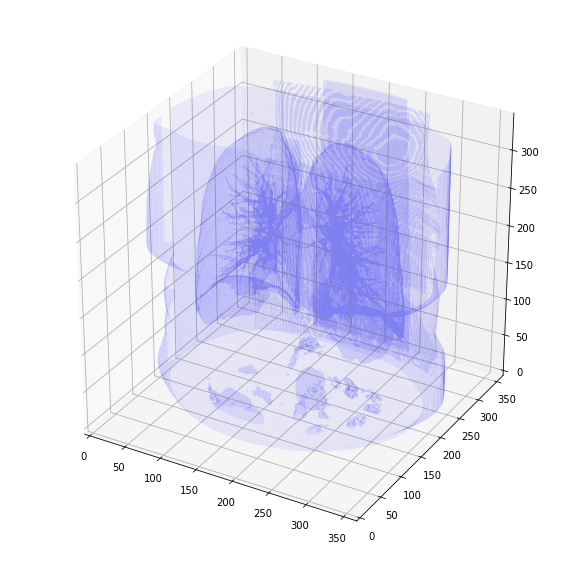

------SEGMENTED LUNGS------


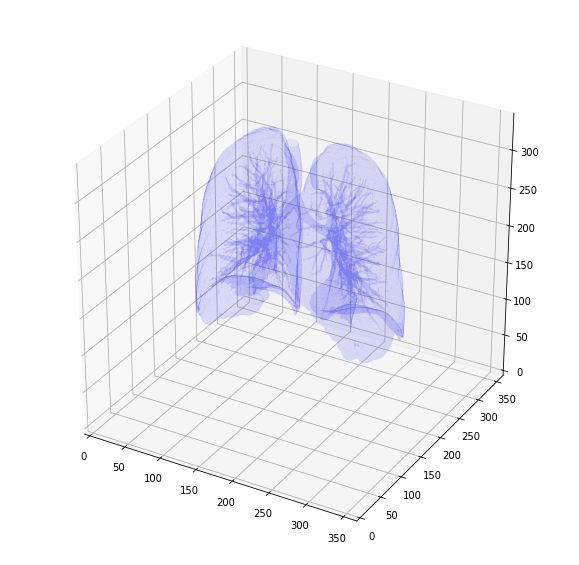

------SEGMENTED LUNGS FILL------


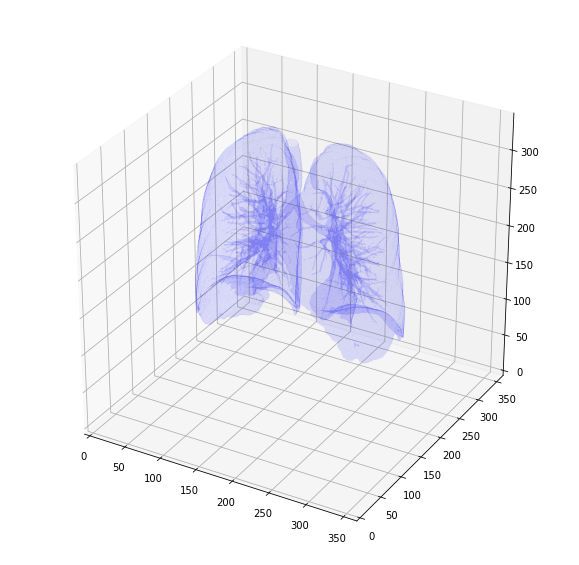

patient_id: b82efe72526c59a96257208d95e54baf
------UN-SEGMENTED SCAN------


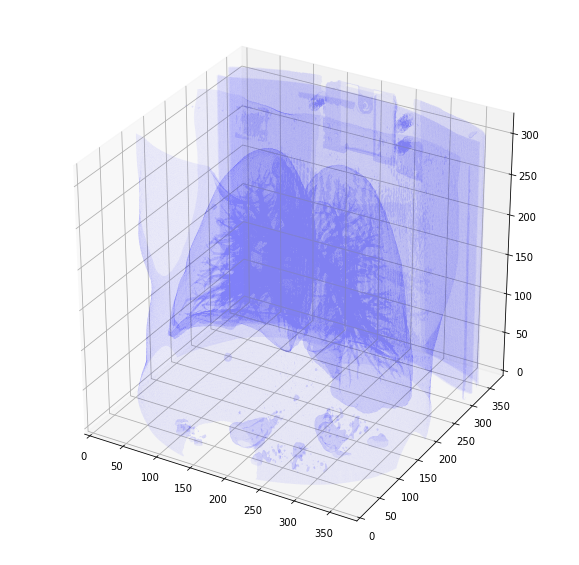

------SEGMENTED LUNGS------


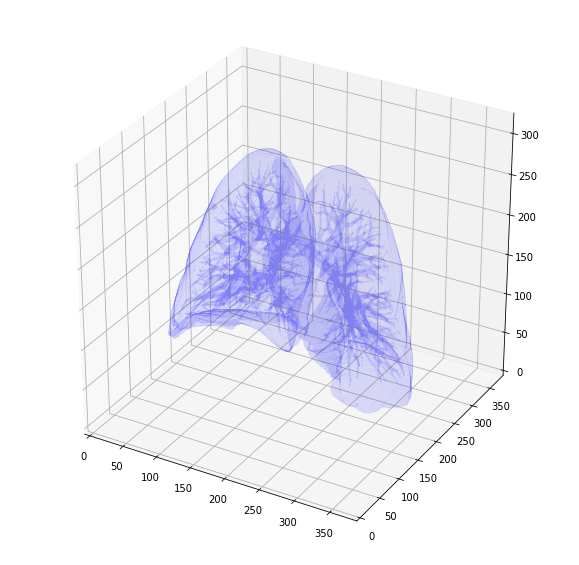

------SEGMENTED LUNGS FILL------


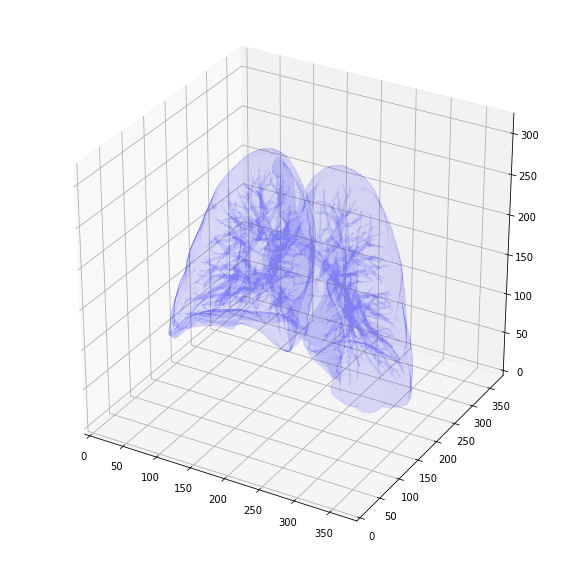

patient_id: 4b2f615f5498ee9d935b0229a2e6bb19
------UN-SEGMENTED SCAN------


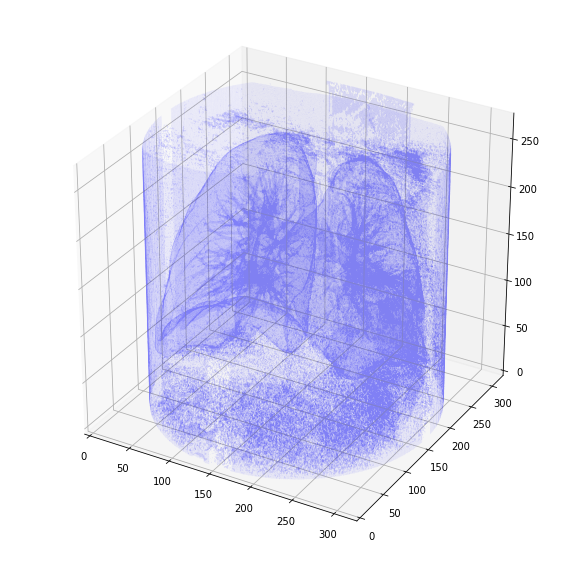

------SEGMENTED LUNGS------


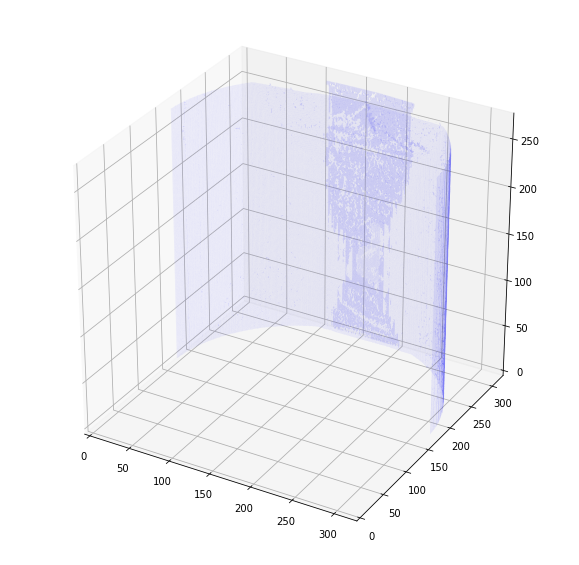

------SEGMENTED LUNGS FILL------


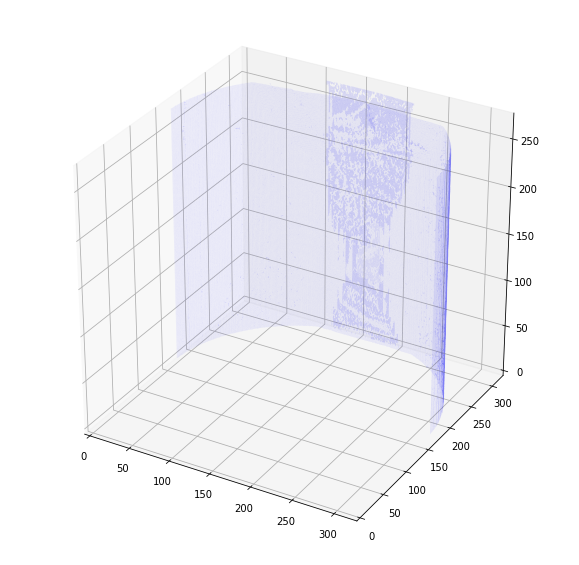

In [6]:
for i in range(len(patient_scans)):
    print('patient_id:', patient_ids[i])
    print('------UN-SEGMENTED SCAN------')
    plot_3d(patient_scans[i])
    print('------SEGMENTED LUNGS------')
    plot_3d(patient_scans_segented_lungs[i])
    print('------SEGMENTED LUNGS FILL------')
    plot_3d(patient_scans_segented_lungs_fill[i])

patient_id: 3295f3f392d8e130155c8912b60161b5
- SEGMENTED LUNGS - 
-328.017966942


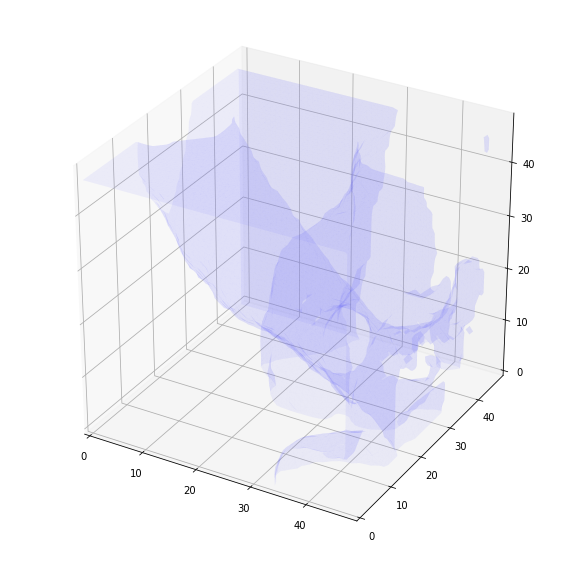

- SEGMENTED LUNGS FILL - 
-328.606409144


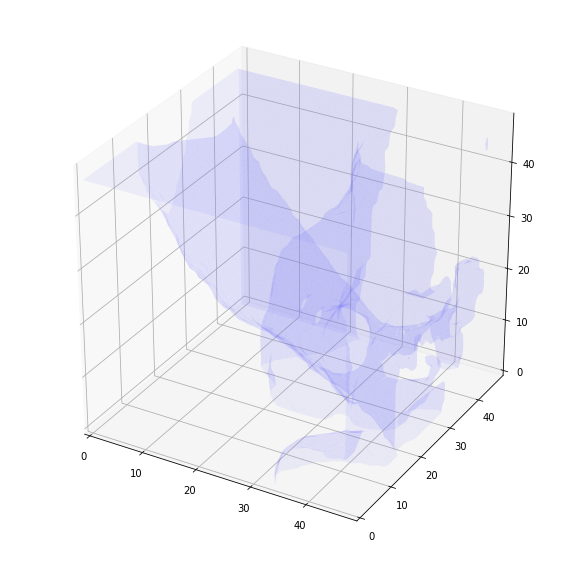

--------
patient_id: c928b4fee44ea322ac65348ae2ff20b8
- SEGMENTED LUNGS - 
-61.206958912


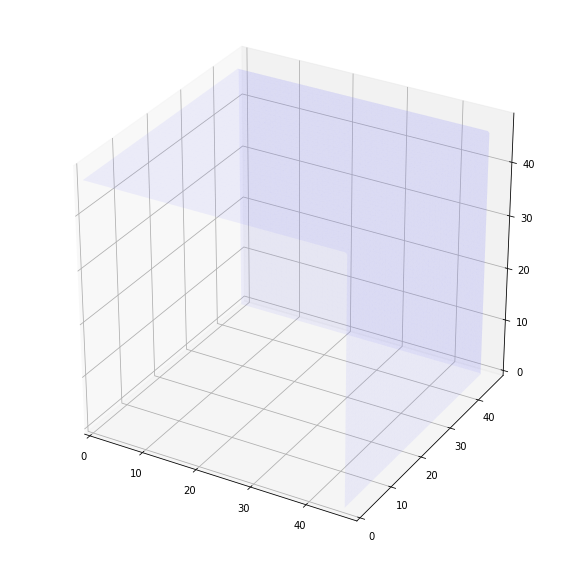

- SEGMENTED LUNGS FILL - 
-61.206958912


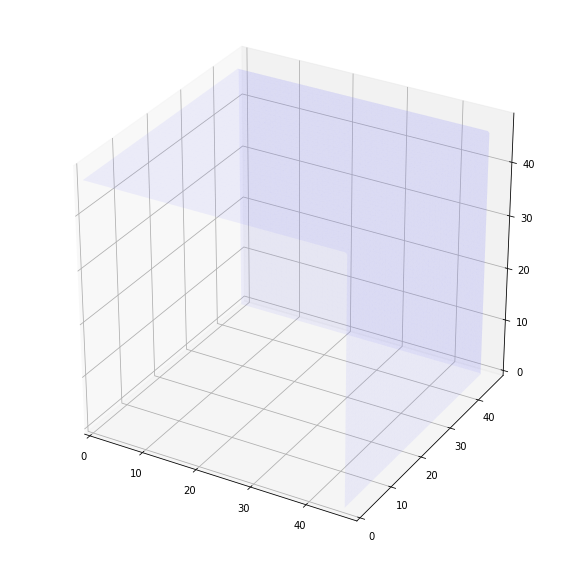

--------
patient_id: a334d15ac8d2d25bce76693b1b2a3ed7
- SEGMENTED LUNGS - 
-245.200801143


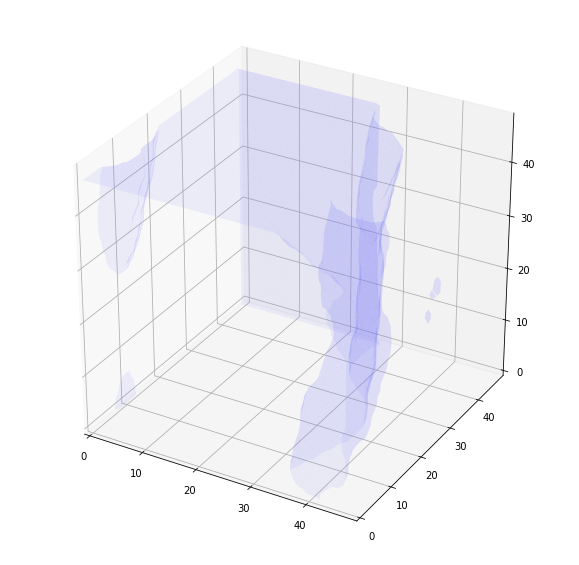

- SEGMENTED LUNGS FILL - 
-245.215042679


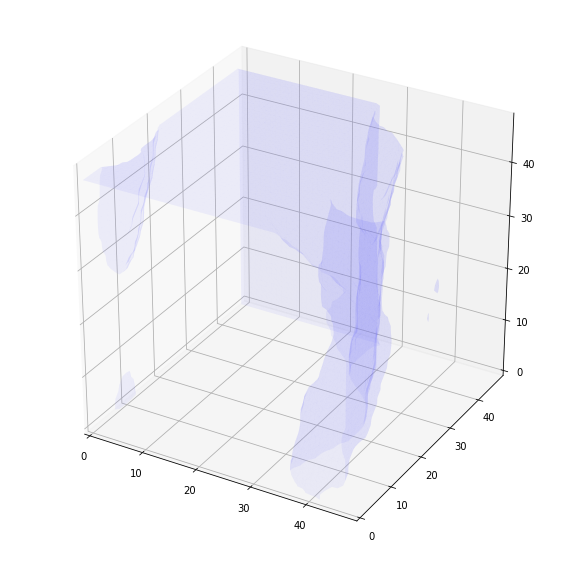

--------
patient_id: 7395f64fba89c2463a1b13c400adf876
- SEGMENTED LUNGS - 
-261.905427156


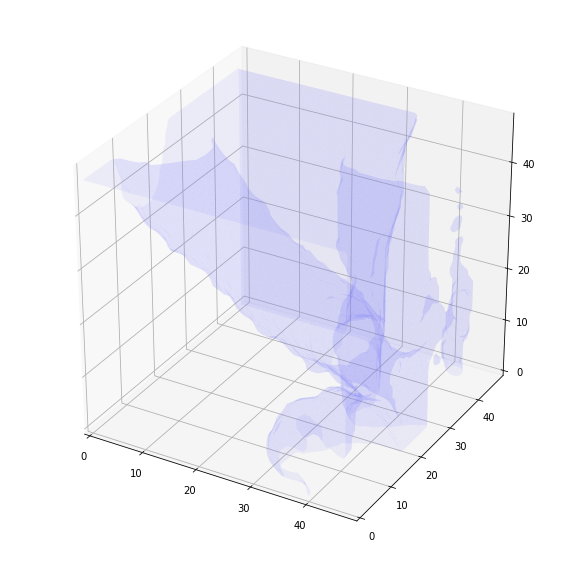

- SEGMENTED LUNGS FILL - 
-262.101490162


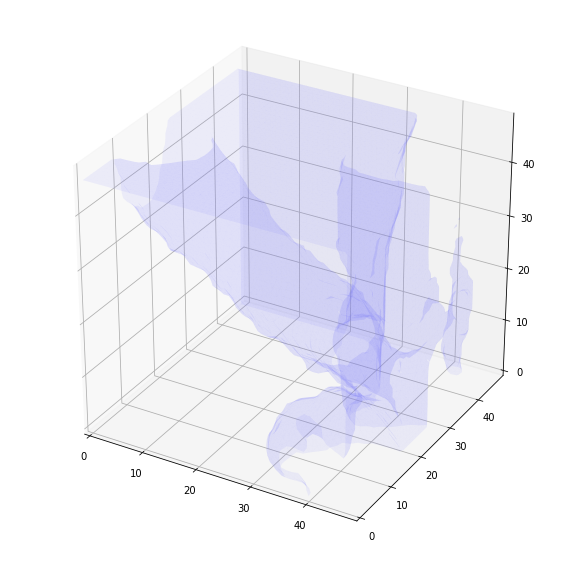

--------
patient_id: 089b8f10743e449a0f64f8f311dd8a46
- SEGMENTED LUNGS - 
-254.731816045


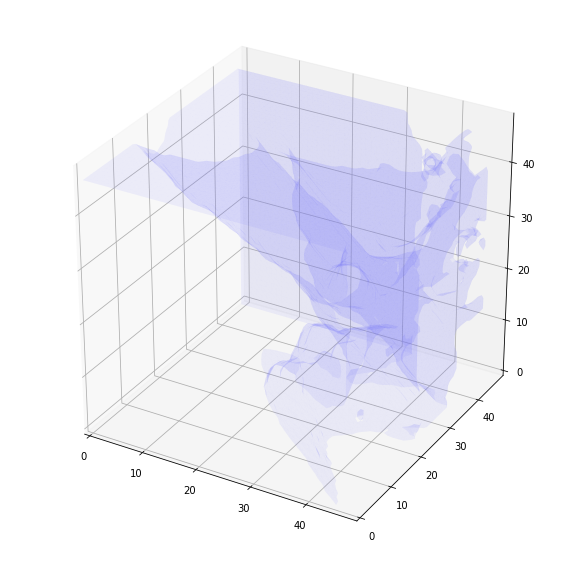

- SEGMENTED LUNGS FILL - 
-254.876862703


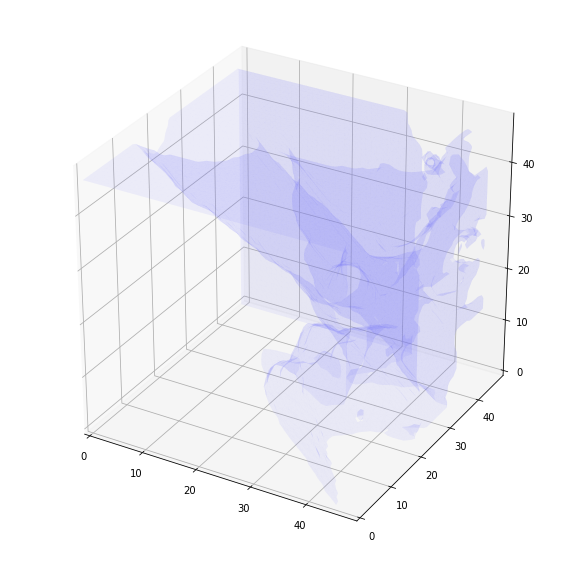

--------
patient_id: fbae4d04285789dfa32124c86586dd09
- SEGMENTED LUNGS - 
-244.133743851


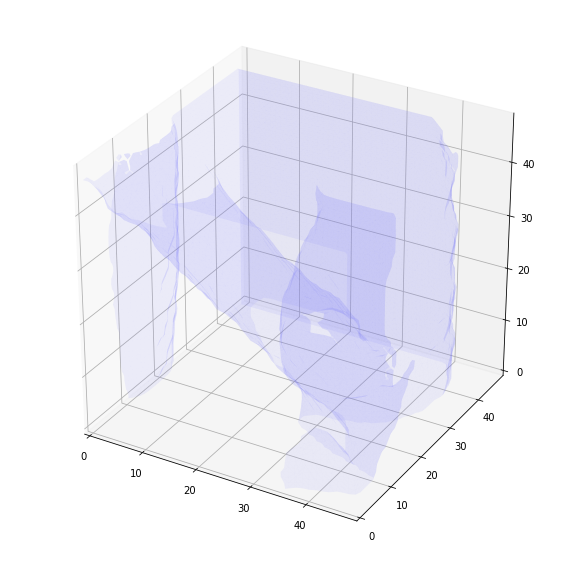

- SEGMENTED LUNGS FILL - 
-244.195773655


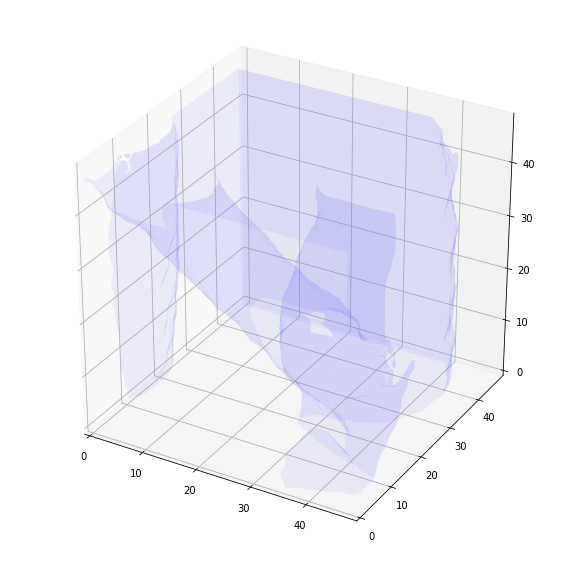

--------
patient_id: 1e0f8048728717064645cb758eb89279
- SEGMENTED LUNGS - 
-61.206958912


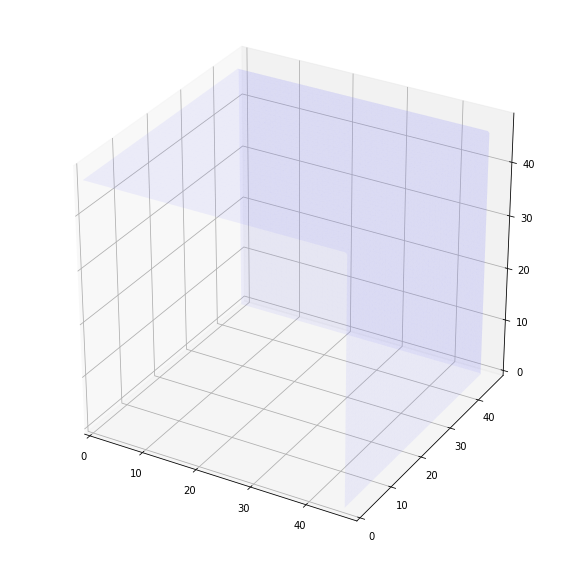

- SEGMENTED LUNGS FILL - 
-61.206958912


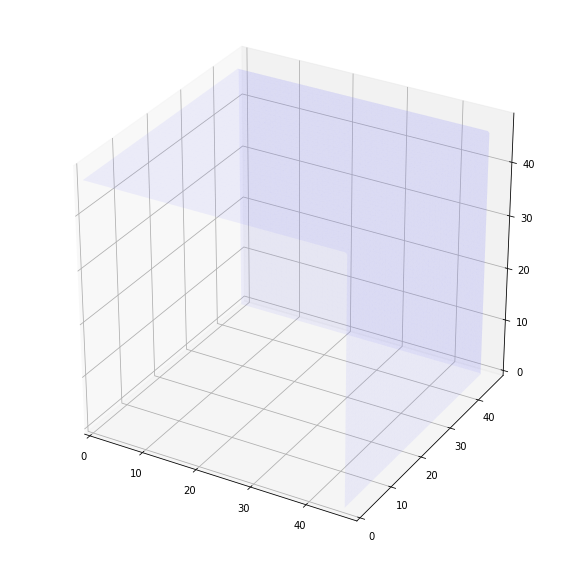

--------
patient_id: 7ec258e536a1e0353375295ad1b71e5b
- SEGMENTED LUNGS - 
-204.608181424


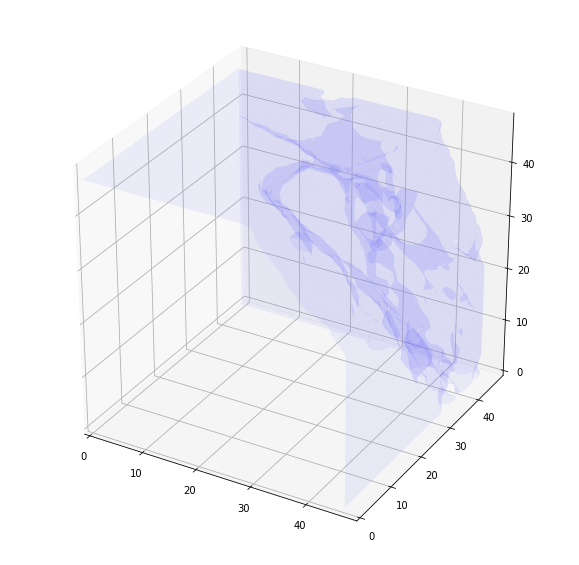

- SEGMENTED LUNGS FILL - 
-204.893021195


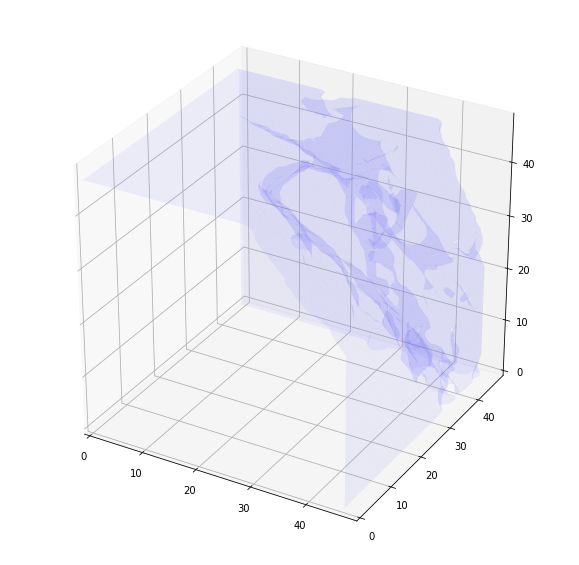

--------
patient_id: b82efe72526c59a96257208d95e54baf
- SEGMENTED LUNGS - 
-264.062789352


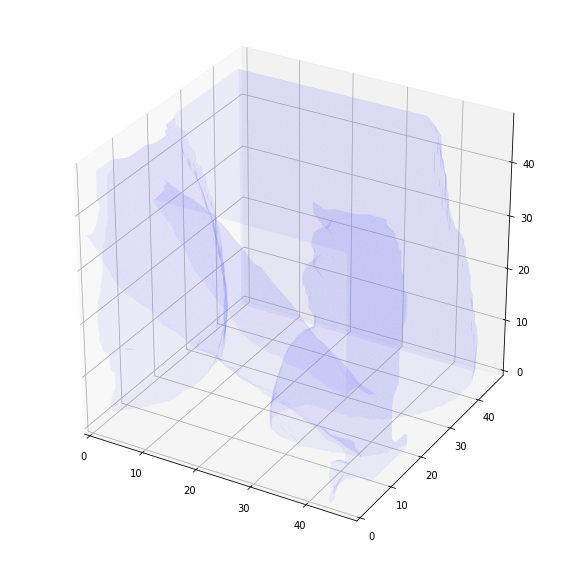

- SEGMENTED LUNGS FILL - 
-264.062789352


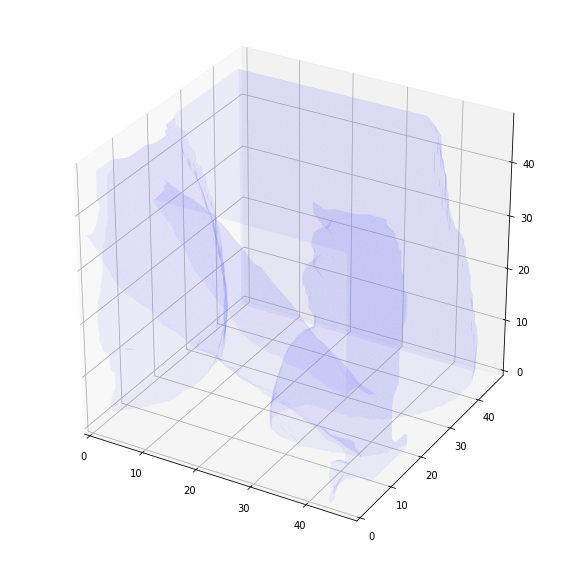

--------
patient_id: 4b2f615f5498ee9d935b0229a2e6bb19
- SEGMENTED LUNGS - 
-61.206958912


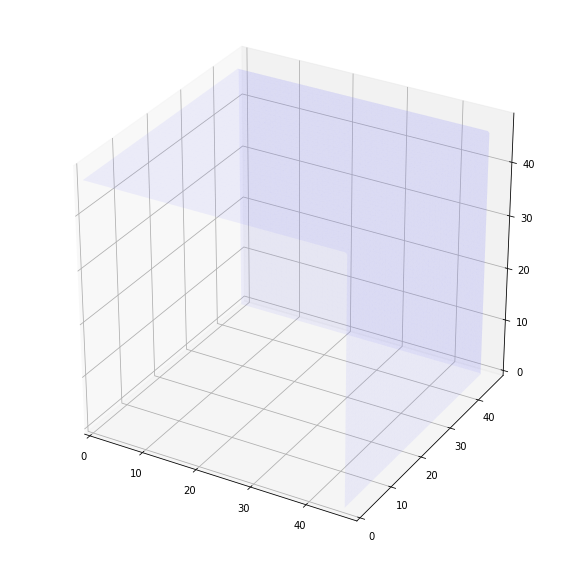

- SEGMENTED LUNGS FILL - 
-61.206958912


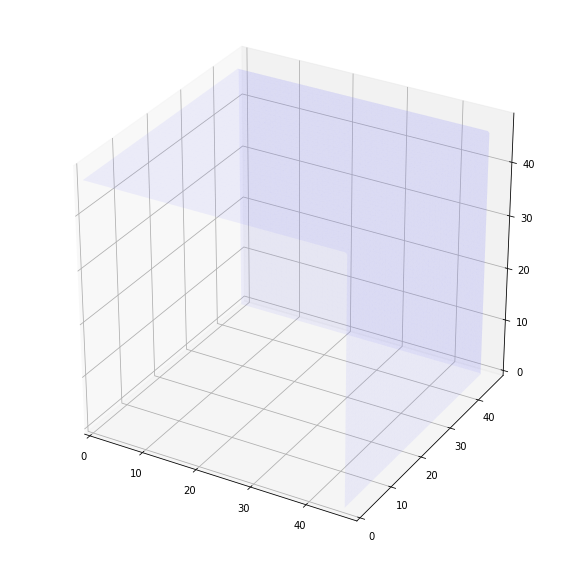

--------


In [34]:
for i in range(len(patient_scans)):
    print('patient_id:', patient_ids[i])
    
    print('- SEGMENTED LUNGS - ')
    scan_lung = patient_scans_segented_lungs[i]
    center_lung = np.full((48, 48, 48), -1000.0)
    center_0 = int(scan_lung.shape[0]/2)
    center_1 = int(scan_lung.shape[1]/2)
    center_2 = int(scan_lung.shape[2]/2)
    center_lung[0:-1, 0:-1, 0:-1] = scan_lung[center_0: center_0+47, center_1: center_1+47, center_2: center_2+47]
    print(np.mean(center_lung))
    plot_3d(center_lung)
    
    print('- SEGMENTED LUNGS FILL - ')
    scan_lung_fill = patient_scans_segented_lungs_fill[i]
    center_lung_fill = np.full((48, 48, 48), -1000.0)
    center_0 = int(scan_lung_fill.shape[0]/2)
    center_1 = int(scan_lung_fill.shape[1]/2)
    center_2 = int(scan_lung_fill.shape[2]/2)

    center_lung_fill[0:-1, 0:-1, 0:-1] = scan_lung_fill[center_0: center_0+47, center_1: center_1+47, center_2: center_2+47]
    print(np.mean(center_lung_fill))
    plot_3d(center_lung_fill)
    
    print('--------')
    